In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Print the shapes of the datasets
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)


In [4]:
# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

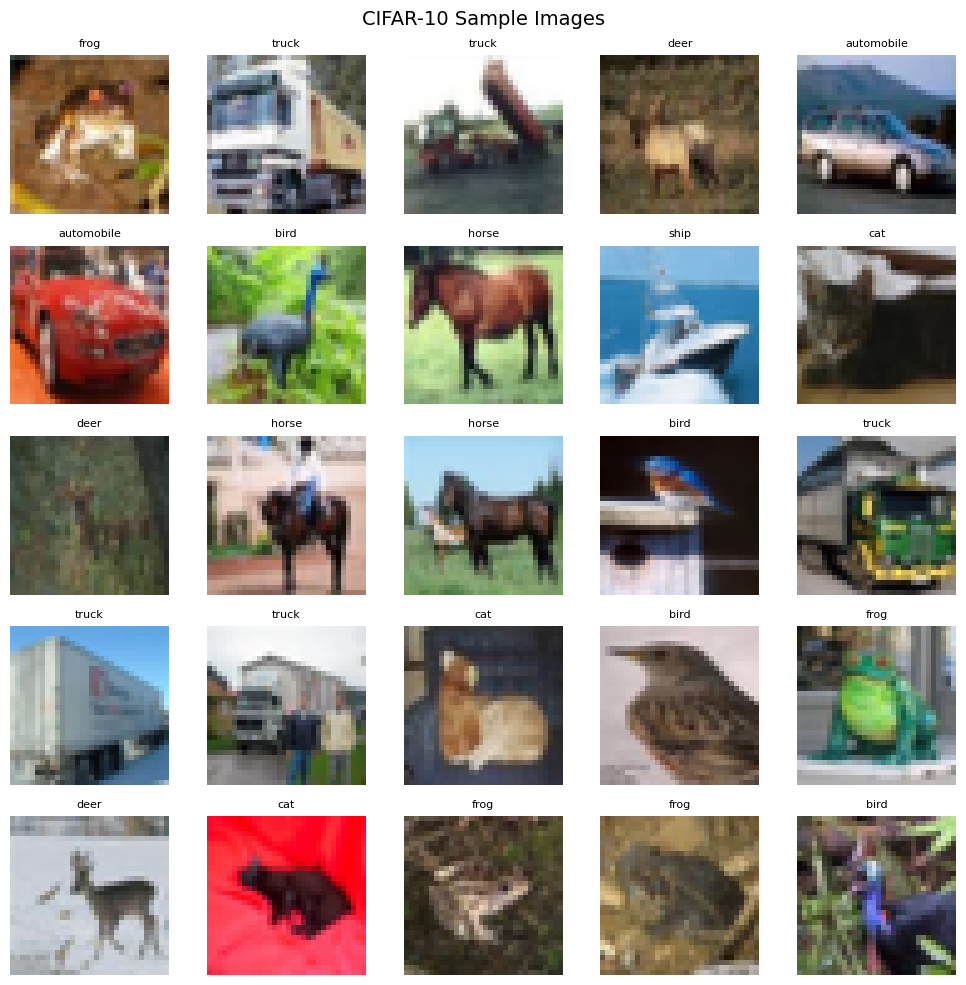

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i].item()], fontsize=8)  # <-- FIX
    plt.axis('off')

plt.suptitle("CIFAR-10 Sample Images", fontsize=14)
plt.tight_layout()
plt.show()


In [7]:
# Normalize (0–255 → 0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [8]:
# Flatten labels (they are 2D arrays)
y_train = y_train.flatten()
y_test = y_test.flatten()

In [9]:
print("New shape of x_train:", x_train.shape)

New shape of x_train: (50000, 32, 32, 3)


In [11]:
# Build a Sequential CNN model for CIFAR-10
model = models.Sequential([
    # Input layer for CIFAR-10 (32x32 pixels, 3 channels RGB)
    Input(shape=(32, 32, 3)),

    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional block (CIFAR needs more depth)
    layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D((2, 2)),

    # Flatten features
    layers.Flatten(),

    # Fully connected dense layer
    layers.Dense(128, activation='relu'),

    # Dropout for regularization
    layers.Dropout(0.3),

    # Output layer (10 classes for CIFAR-10)
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 145ms/step - accuracy: 0.3347 - loss: 1.8141 - val_accuracy: 0.5479 - val_loss: 1.2324
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 134ms/step - accuracy: 0.5653 - loss: 1.2139 - val_accuracy: 0.6555 - val_loss: 0.9984
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 134ms/step - accuracy: 0.6567 - loss: 0.9798 - val_accuracy: 0.6871 - val_loss: 0.9043
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 135ms/step - accuracy: 0.6982 - loss: 0.8559 - val_accuracy: 0.7167 - val_loss: 0.8206
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 133ms/step - accuracy: 0.7367 - loss: 0.7541 - val_accuracy: 0.7192 - val_loss: 0.8044
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 135ms/step - accuracy: 0.7559 - loss: 0.6977 - val_accuracy: 0.7374 - val_loss: 0.7629
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 133ms/step - accuracy: 0.7814 - loss: 0.6247 - val_accuracy: 0.7407 - val_loss: 0.7642
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 134ms/step - accuracy: 0.7958 -

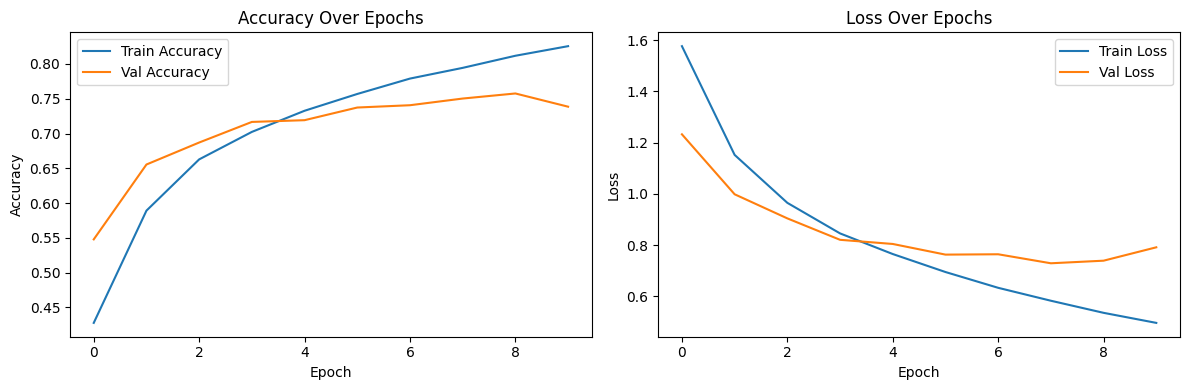

In [13]:
# Plot training vs validation accuracy & loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7418 - loss: 0.7766
Test Accuracy: 0.7386


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


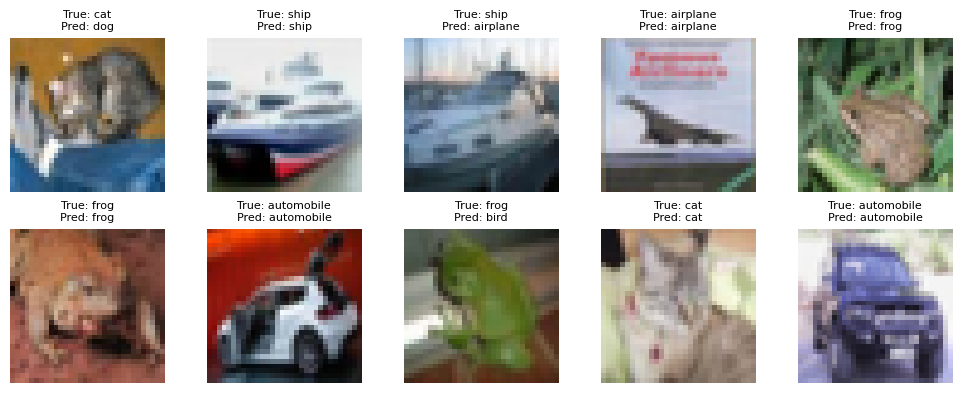

In [15]:
# Predict the first 10 test samples
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

# Display predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])   # RGB image, no cmap needed
    plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[predicted_labels[i]]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Model Performance Report

This notebook trains a Convolutional Neural Network (CNN) on the CIFAR-10 dataset.

**Data Preprocessing:**
- The CIFAR-10 dataset was loaded and split into training and testing sets.
- The image data was normalized to the range [0, 1].
- The labels were flattened to a 1D array.

**Model Architecture:**
The CNN model consists of:
- Three convolutional blocks, each with a Conv2D layer, ReLU activation, and MaxPooling2D.
- A Flatten layer to convert the 3D feature maps to 1D.
- A Dense layer with ReLU activation.
- A Dropout layer for regularization.
- An output Dense layer with Softmax activation for 10 classes.

**Training:**
- The model was compiled with the Adam optimizer and sparse categorical crossentropy loss.
- The model was trained for 10 epochs with a batch size of 64.

**Results:**
- The training process showed increasing accuracy and decreasing loss over epochs.
- The final test accuracy achieved was approximately **{{test_accuracy:.4f}}**.
- The plots show that the validation accuracy and loss plateaued and started to diverge from the training metrics, suggesting some overfitting.

**Further Improvements:**
- Data augmentation could be used to increase the size and diversity of the training data.
- Experimenting with different network architectures and hyperparameters could improve performance.
- Implementing early stopping could prevent overfitting.